# Nettoyage des données de Formula 1

## Importation des packages

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Chargement des données

In [2]:
# Chargement des fichiers CSV dans des DataFrames
weather = pd.read_csv("Data/Weather(2018 - 2024).csv")
pit_stops = pd.read_csv("Data/pit_stops.csv")
circuits = pd.read_csv("Data/circuits.csv")
qualifying = pd.read_csv("Data/qualifying.csv")
constructor_results = pd.read_csv("Data/constructor_results.csv")
races = pd.read_csv("Data/races.csv")
constructor_standings = pd.read_csv("Data/constructor_standings.csv")
results = pd.read_csv("Data/results.csv")
constructors = pd.read_csv("Data/constructors.csv")
seasons = pd.read_csv("Data/seasons.csv")
driver_standings = pd.read_csv("Data/driver_standings.csv")
sprint_results = pd.read_csv("Data/sprint_results.csv")
drivers = pd.read_csv("Data/drivers.csv")
status = pd.read_csv("Data/status.csv")
lap_times = pd.read_csv("Data/lap_times.csv")

In [3]:
# Vérification des DataFrames chargés
print("Fichiers chargés avec succès:")
print(f"weather: {weather.shape}")
print(f"pit_stops: {pit_stops.shape}")
print(f"circuits: {circuits.shape}")
print(f"qualifying: {qualifying.shape}")
print(f"constructor_results: {constructor_results.shape}")
print(f"races: {races.shape}")
print(f"constructor_standings: {constructor_standings.shape}")
print(f"results: {results.shape}")
print(f"constructors: {constructors.shape}")
print(f"seasons: {seasons.shape}")
print(f"driver_standings: {driver_standings.shape}")
print(f"sprint_results: {sprint_results.shape}")
print(f"drivers: {drivers.shape}")
print(f"status: {status.shape}")
print(f"lap_times: {lap_times.shape}")

Fichiers chargés avec succès:
weather: (21859, 10)
pit_stops: (10990, 7)
circuits: (77, 9)
qualifying: (10254, 9)
constructor_results: (12505, 5)
races: (1125, 18)
constructor_standings: (13271, 7)
results: (26519, 18)
constructors: (212, 5)
seasons: (75, 2)
driver_standings: (34595, 7)
sprint_results: (300, 16)
drivers: (859, 9)
status: (139, 2)
lap_times: (575029, 6)


## Nettoyage du fichier météo

In [4]:
## 10 premieres lignes
weather.head(10)

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Round Number,Year
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,1,2018
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3,1,2018
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5,1,2018
5,0 days 00:05:57.132000,24.2,35.8,997.1,False,38.7,309,3.5,1,2018
6,0 days 00:06:57.146000,24.2,36.5,997.1,False,38.8,306,2.0,1,2018
7,0 days 00:07:57.159000,24.2,36.3,997.0,False,38.9,307,4.1,1,2018
8,0 days 00:08:58.221000,24.2,36.3,996.9,False,38.2,296,3.8,1,2018
9,0 days 00:09:57.189000,24.1,36.6,997.1,False,37.1,289,3.7,1,2018


In [5]:
## Analyese des types de données
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21859 entries, 0 to 21858
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           21859 non-null  object 
 1   AirTemp        21859 non-null  float64
 2   Humidity       21859 non-null  float64
 3   Pressure       21859 non-null  float64
 4   Rainfall       21859 non-null  bool   
 5   TrackTemp      21859 non-null  float64
 6   WindDirection  21859 non-null  int64  
 7   WindSpeed      21859 non-null  float64
 8   Round Number   21859 non-null  int64  
 9   Year           21859 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
## Analyse des valeurs manquantes
weather.isnull().sum()

Time             0
AirTemp          0
Humidity         0
Pressure         0
Rainfall         0
TrackTemp        0
WindDirection    0
WindSpeed        0
Round Number     0
Year             0
dtype: int64

Il y'a pas des valeurs manquantes

In [8]:
## Analyse des doublons
if weather.duplicated().any():
    print('Le dataset contient des doublons')
else:
    print("Le dataset ne contient pas des doublons")

Le dataset contient des doublons


In [9]:
duplicates = weather[weather.duplicated()]
print(duplicates)

                        Time  AirTemp  Humidity  Pressure  Rainfall  \
5180  0 days 00:00:22.167000     19.4      36.2     946.1     False   
5181  0 days 00:01:22.173000     19.8      37.6     946.1     False   
5182  0 days 00:02:22.184000     20.3      36.9     946.1     False   
5183  0 days 00:03:22.188000     20.5      35.6     946.1     False   
5184  0 days 00:04:22.189000     20.5      35.1     946.1     False   
...                      ...      ...       ...       ...       ...   
8467  0 days 01:53:32.188000     26.4      39.5     938.3     False   
8468  0 days 01:54:32.180000     26.3      40.8     938.2     False   
8469  0 days 01:55:32.172000     26.2      42.3     938.3     False   
8470  0 days 01:56:32.171000     26.3      41.7     938.3     False   
8471  0 days 01:57:32.171000     26.2      41.9     938.4     False   

      TrackTemp  WindDirection  WindSpeed  Round Number  Year  
5180       38.7            348        1.1             1  2020  
5181       39.0    

In [10]:
## Supprimer les doublons
weather_unique = weather.drop_duplicates()

In [11]:
## Analyse des doublons
if weather_unique.duplicated().any():
    print('Le dataset contient des doublons')
else:
    print("Le dataset ne contient pas des doublons")

Le dataset ne contient pas des doublons


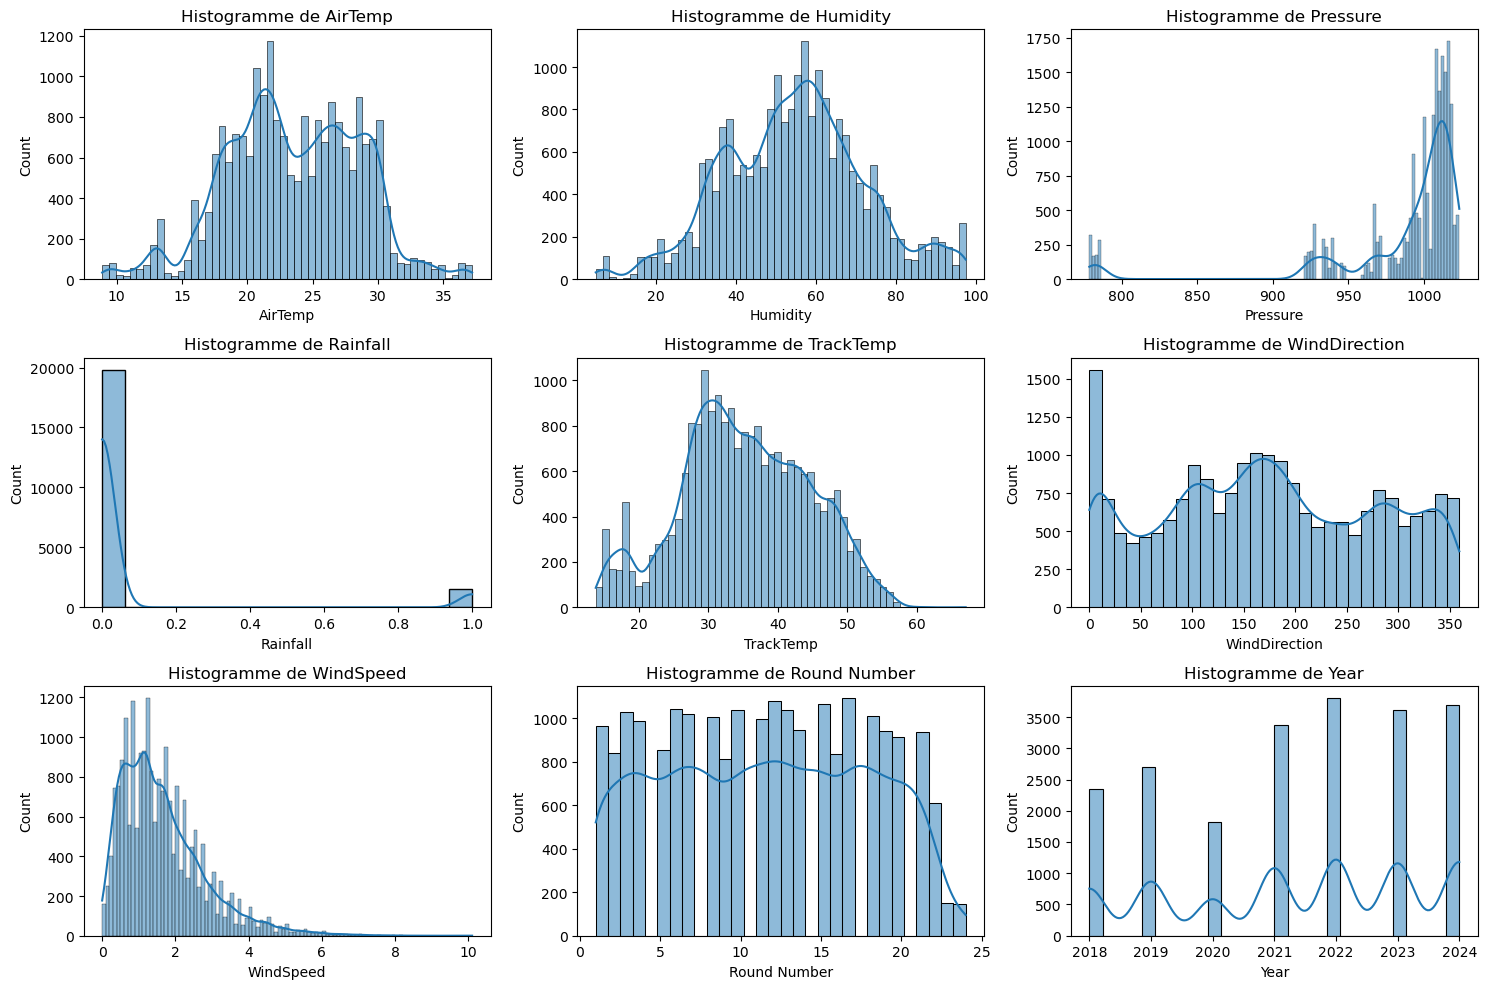

In [37]:
## Analyses des distrubitions
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes numériques
numeric_columns = weather_unique.select_dtypes(['int', 'float', 'bool'])

# Créer une figure avec plusieurs sous-graphes
plt.figure(figsize=(15, 10))
# Itérer sur chaque colonne numérique et afficher l'histogramme
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)  # Disposer les histogrammes en grille
    sns.histplot(data=weather_unique, x=column, kde=True)  # Ajouter une courbe KDE pour la densité
    plt.title(f'Histogramme de {column}')  # Titre pour chaque histogramme

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher les graphiques
plt.show()

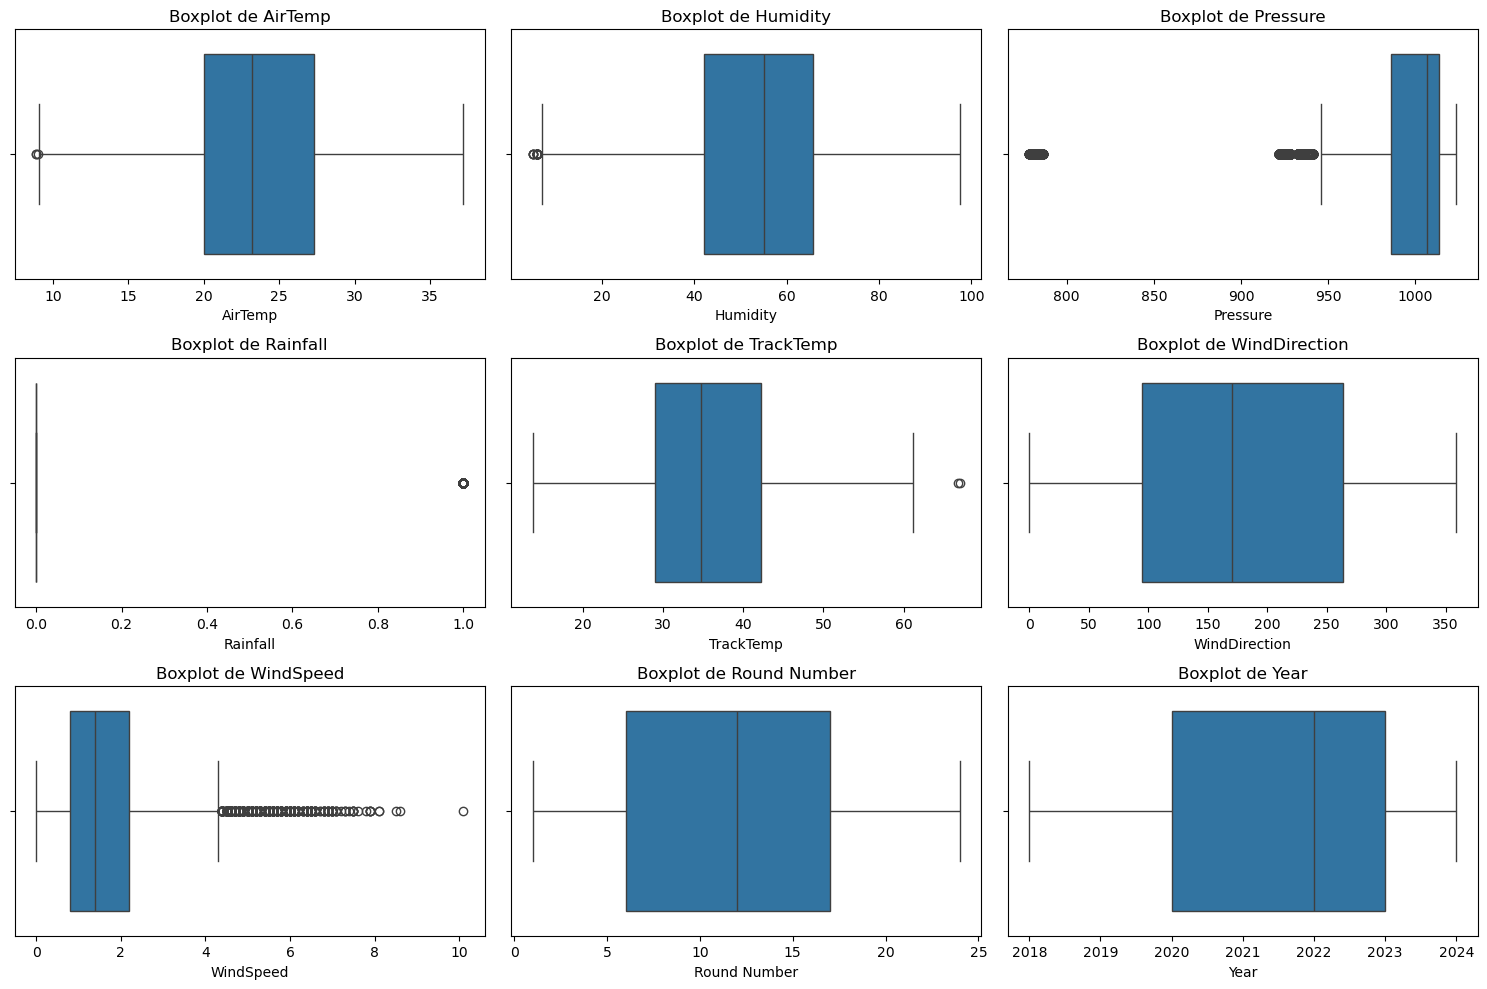

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes numériques
numeric_columns = weather_unique.select_dtypes(['int', 'float', 'bool'])

# Créer une figure avec plusieurs sous-graphes
plt.figure(figsize=(15, 10))

# Itérer sur chaque colonne numérique et afficher le boxplot
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)  # Disposer les boxplots en grille
    sns.boxplot(data=weather_unique, x=column)  # Boxplot pour chaque colonne
    plt.title(f'Boxplot de {column}')  # Titre pour chaque boxplot

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [2]:
import pandas as pd

races = pd.read_excel('races.xlsx')

In [3]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [6]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   raceId       1125 non-null   int64         
 1   year         1125 non-null   int64         
 2   round        1125 non-null   int64         
 3   circuitId    1125 non-null   int64         
 4   name         1125 non-null   object        
 5   date         1125 non-null   datetime64[ns]
 6   time         1125 non-null   object        
 7   url          1125 non-null   object        
 8   fp1_date     1125 non-null   object        
 9   fp1_time     1125 non-null   object        
 10  fp2_date     1125 non-null   object        
 11  fp2_time     1125 non-null   object        
 12  fp3_date     1125 non-null   object        
 13  fp3_time     1125 non-null   object        
 14  quali_date   1125 non-null   object        
 15  quali_time   1125 non-null   object        
 16  sprint